In [74]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

## Training Models

### Linear Regression

In [75]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [76]:
# generate data using known parameters, we will try and learn these parameters during training
# X = 10*torch.randn(size=(1000,1), device=device)
X = 10*torch.randn(size=(1000,1), device=device)
y =  3*(X**2) - 2*X + 4
noise = 150*torch.randn(size=(1000,1), device=device)
y = y + noise


In [77]:
# create training and testing splits
train_split = int(0.8 * len(X))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test), X_train, torch.min(y_train)

(800,
 800,
 200,
 200,
 tensor([[-5.9750e+00],
         [-1.8331e+01],
         [-1.1112e+00],
         [-1.0952e+01],
         [ 9.8129e+00],
         [-1.4008e+01],
         [ 1.2673e+00],
         [ 5.0269e+00],
         [-2.6031e+00],
         [-9.0951e+00],
         [ 3.0221e-01],
         [ 5.7429e-01],
         [-1.6391e+01],
         [-1.2212e+01],
         [-8.2831e-01],
         [-3.8955e+00],
         [-2.6050e+00],
         [-1.0291e+01],
         [-8.3870e+00],
         [-6.6061e+00],
         [-9.6412e-01],
         [-2.2348e+01],
         [ 1.3109e+01],
         [ 5.4850e+00],
         [-8.2349e+00],
         [-7.4035e-01],
         [ 1.0515e+01],
         [-1.1951e+00],
         [ 1.4534e+01],
         [ 1.4291e+00],
         [-1.1956e+01],
         [-9.0273e+00],
         [-1.4396e+01],
         [ 7.0186e+00],
         [-5.4622e+00],
         [ 5.8224e+00],
         [ 2.1351e+00],
         [-7.0977e+00],
         [ 1.4669e+01],
         [-1.7110e+01],
         [-8.166

In [78]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    
    plt.figure(figsize=(10,7))
    
    # plot training data in blue
    plt.scatter(train_data.cpu(), train_labels.cpu(), c="b", s=4, label="Training Data")
    
    # plot test data in red
    plt.scatter(test_data.cpu(), test_labels.cpu(), c="g", s=4, label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data.cpu(), predictions.cpu(), c='r', s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})
    
    plt.show()

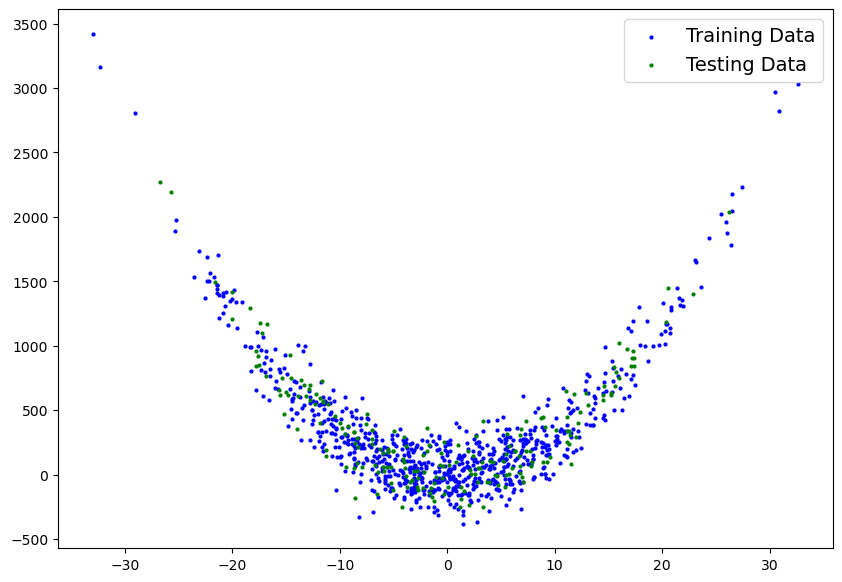

In [79]:
plot_predictions(X_train, y_train, X_test, y_test)

In [80]:
def h_theta(x, params):
    return params[0] + params[1]*x

In [81]:
# cost function = (1/2)* sum(h(x_i)-y_i)^2

def gradient_descent(data, labels, weight, bias, lr, num_batches):
    
    randomidxs = torch.randperm(len(data))
    data = data[randomidxs]
    labels = labels[randomidxs]
    
    batchsize = int(len(data)/num_batches)
    
    for n in range(num_batches):
    
        data_minibatch = data[n*batchsize:(n+1)*batchsize]
        labels_minibatch = labels[n*batchsize:(n+1)*batchsize]
    
        weight_grad = 0
        bias_grad = 0
    
        for x,y in zip(data_minibatch,labels_minibatch):
            pred = h_theta(x.item(),(bias, weight))
            weight_grad += (pred-y.item())*(x.item())
            bias_grad += (pred-y.item())    

        weight = weight - lr*(weight_grad/len(data_minibatch))
        bias = bias - lr*(bias_grad/len(data_minibatch))
        
    return weight, bias

In [82]:
for epoch in range(100):
    weight, bias = gradient_descent(X_train, y_train, 1, 1, 0.01, 8)
    if(epoch % 20 == 0):
        print(f"epoch {epoch}: weight = {weight}, bias = {bias}")

epoch 0: weight = 1.785451095128213, bias = 25.191679611752292
epoch 20: weight = -4.842570449144168, bias = 25.411865395167922
epoch 40: weight = -10.522698574754962, bias = 25.319044526810487
epoch 60: weight = -3.4479323518119456, bias = 25.0523363909944
epoch 80: weight = -7.244342790843955, bias = 25.29644579155675


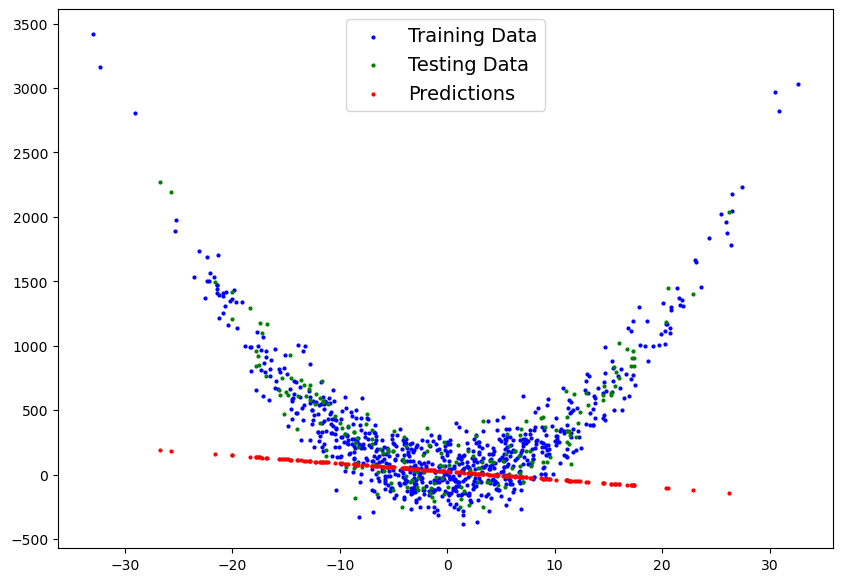

In [83]:
plot_predictions(X_train, y_train, X_test, y_test, h_theta(X_test, [bias, weight]))

### Polynomial Regression

epoch 0: theta1 = 2.9414855146255747, theta2 = 0.9661823287697792, theta3 = 1.005509495438266
epoch 20: theta1 = 3.0363008575994033, theta2 = 0.5555506937310337, theta3 = 1.004744893418621
epoch 40: theta1 = 2.982693400743, theta2 = 0.20738704561316326, theta3 = 1.0032511524043108
epoch 60: theta1 = 3.0083967389951507, theta2 = -0.08647029665832495, theta3 = 1.0018462570305187
epoch 80: theta1 = 3.007945247872907, theta2 = -0.3322017189589641, theta3 = 1.0003065543854306
epoch 100: theta1 = 2.993946272931365, theta2 = -0.5411586552976939, theta3 = 0.9986177411962097
epoch 120: theta1 = 3.026211867813352, theta2 = -0.7187606161992289, theta3 = 0.9968308929221682
epoch 140: theta1 = 3.048289593990305, theta2 = -0.868518223464035, theta3 = 0.9949959534078587
epoch 160: theta1 = 2.9942616272346, theta2 = -0.9961339941511633, theta3 = 0.9929641377550914
epoch 180: theta1 = 2.9694657428394793, theta2 = -1.101807859260555, theta3 = 0.9909030967002335
epoch 200: theta1 = 3.0269958448801337, th

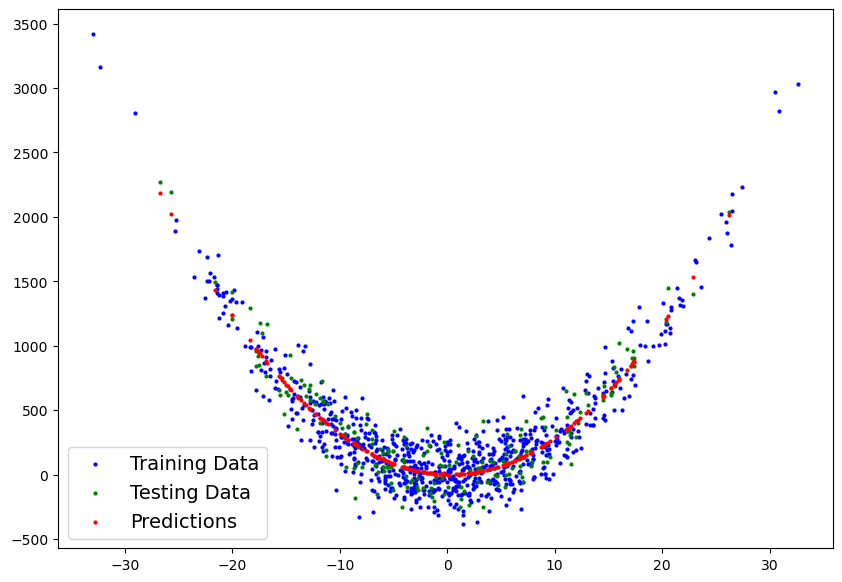

In [87]:
def h_theta_poly(x, params):
    return params[0]*(x**2) + params[1]*x + params[2]

def gradient_descent(data, labels, params, lr, num_batches):

    randomidxs = torch.randperm(len(data))
    data = data[randomidxs]
    labels = labels[randomidxs]

    batchsize = int(len(data)/num_batches)
    
    for n in range(num_batches):
    
        data_minibatch = data[n*batchsize:(n+1)*batchsize]
        labels_minibatch = labels[n*batchsize:(n+1)*batchsize]
    
        theta1_grad = 0
        theta2_grad = 0
        theta3_grad = 0
    
        for x,y in zip(data_minibatch,labels_minibatch):
            pred = h_theta_poly(x.item(),params)
            theta1_grad += (pred-y.item())*(x.item()**2)
            theta2_grad += (pred-y.item())*(x.item())
            theta3_grad += (pred-y.item())

        params[0] = params[0] - lr*(theta1_grad/len(data_minibatch))
        params[1] = params[1] - lr*(theta2_grad/len(data_minibatch))
        params[2] = params[2] - lr*(theta3_grad/len(data_minibatch))

    return params

params = [1,1,1]
for epoch in range(1000):
    params = gradient_descent(X_train, y_train, params, 0.00001, 8)
    if(epoch % 20 == 0):
        print(f"epoch {epoch}: theta1 = {params[0]}, theta2 = {params[1]}, theta3 = {params[2]}")

plot_predictions(X_train, y_train, X_test, y_test, h_theta_poly(X_test, params))